# Requirements

In [306]:
# Install chromium, its driver, and selenium.
!apt update
!apt install chromium-chromedriver
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
21 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
c

In [307]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Configuration

In [308]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [309]:
# Initialize the webdriver.
#browser = webdriver.Chrome(options=options)

In [310]:
# Navigate to a web page.
#browser.get('https://www.apple.com/mk/')

In [311]:
# Print the page source code.
#print(browser.page_source)

In [312]:
# Select an element from the page.
#element = browser.find_element(By.CLASS_NAME, 'headline')

In [313]:
#type(element)

In [314]:
# Print the element's innner text.
#print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping on the website https://books.toscrape.com/. Your task includes the extraction of book titles and prices for a minimum of 20 books from this website. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of book prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [315]:
# Write your code here. Add as many code boxes as you need.

In [316]:
browser = webdriver.Chrome(options=options)

In [317]:
browser.get('https://books.toscrape.com/')

In [318]:
#print(browser.page_source)

In [319]:
ol = browser.find_elements(By.CSS_SELECTOR, 'ol > li > article > h3')

In [320]:
print(ol)

[<selenium.webdriver.remote.webelement.WebElement (session="d45b8eb0e9bcc8e8bfb18ac4418c218f", element="6E4AB25DAEEDD236A03414B0F1818DB5_element_6")>, <selenium.webdriver.remote.webelement.WebElement (session="d45b8eb0e9bcc8e8bfb18ac4418c218f", element="6E4AB25DAEEDD236A03414B0F1818DB5_element_7")>, <selenium.webdriver.remote.webelement.WebElement (session="d45b8eb0e9bcc8e8bfb18ac4418c218f", element="6E4AB25DAEEDD236A03414B0F1818DB5_element_8")>, <selenium.webdriver.remote.webelement.WebElement (session="d45b8eb0e9bcc8e8bfb18ac4418c218f", element="6E4AB25DAEEDD236A03414B0F1818DB5_element_9")>, <selenium.webdriver.remote.webelement.WebElement (session="d45b8eb0e9bcc8e8bfb18ac4418c218f", element="6E4AB25DAEEDD236A03414B0F1818DB5_element_10")>, <selenium.webdriver.remote.webelement.WebElement (session="d45b8eb0e9bcc8e8bfb18ac4418c218f", element="6E4AB25DAEEDD236A03414B0F1818DB5_element_11")>, <selenium.webdriver.remote.webelement.WebElement (session="d45b8eb0e9bcc8e8bfb18ac4418c218f", ele

In [321]:
titles = []
for i in ol:
  titles.append(i.text)
print(titles)

['A Light in the ...', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History ...', 'The Requiem Red', 'The Dirty Little Secrets ...', 'The Coming Woman: A ...', 'The Boys in the ...', 'The Black Maria', 'Starving Hearts (Triangular Trade ...', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little ...", 'Rip it Up and ...', 'Our Band Could Be ...', 'Olio', 'Mesaerion: The Best Science ...', 'Libertarianism for Beginners', "It's Only the Himalayas"]


In [322]:
len(titles)

20

In [323]:
ol_prices=browser.find_elements(By.CSS_SELECTOR,'ol > li > article > div.product_price > p.price_color')
prices= []
for i in ol_prices:
  prices.append(i.text)
#prices

In [324]:
len(prices)

20

In [325]:
for i in range(len(prices)):
  prices[i]=prices[i].replace('£','')
  prices[i]=float(prices[i])
prices

[51.77,
 53.74,
 50.1,
 47.82,
 54.23,
 22.65,
 33.34,
 17.93,
 22.6,
 52.15,
 13.99,
 20.66,
 17.46,
 52.29,
 35.02,
 57.25,
 23.88,
 37.59,
 51.33,
 45.17]

In [326]:
matrix=[]
for i in range(len(prices)):
  node={}
  node['title']=titles[i]
  node['price']=prices[i]
  matrix.append(node)
len(matrix)

20

In [327]:
df=pd.DataFrame(matrix)
df

,title,price
0,A Light in the ...,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History ...,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets ...,33.34
7,The Coming Woman: A ...,17.93
8,The Boys in the ...,22.60
9,The Black Maria,52.15


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   20 non-null     object 
 1   price   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [329]:
df.median()


<ipython-input-329-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


price    41.38
dtype: float64

In [330]:
df.mean()

<ipython-input-330-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


price    38.0485
dtype: float64

In [331]:

df.min()


title    A Light in the ...
price                 13.99
dtype: object

In [332]:
df.max()

title    Tipping the Velvet
price                 57.25
dtype: object

In [333]:
df.std()

<ipython-input-333-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


price    15.135231
dtype: float64

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   20 non-null     object 
 1   price   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


array([[<Axes: title={'center': 'price'}>]], dtype=object)

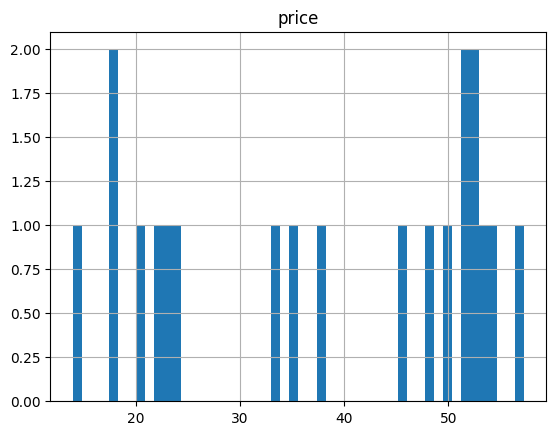

In [335]:
df.hist(bins=50)

<Axes: >

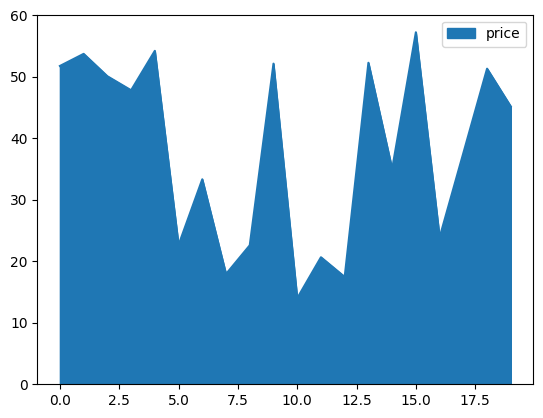

In [336]:
df.plot.area()

<ipython-input-337-ad5e228aed2c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],bins=5,label='price')


<Axes: xlabel='price', ylabel='Density'>

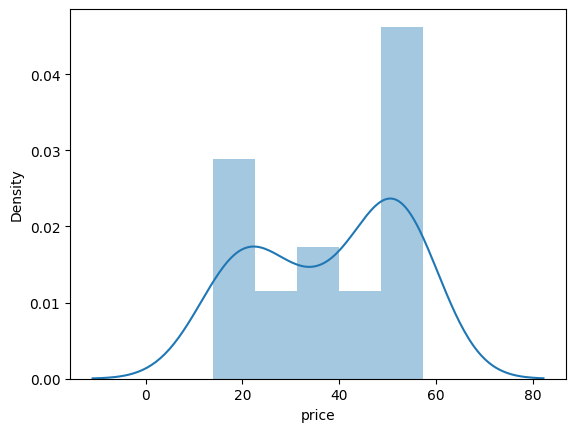

In [337]:
import seaborn as sns
sns.distplot(df['price'],bins=5,label='price')

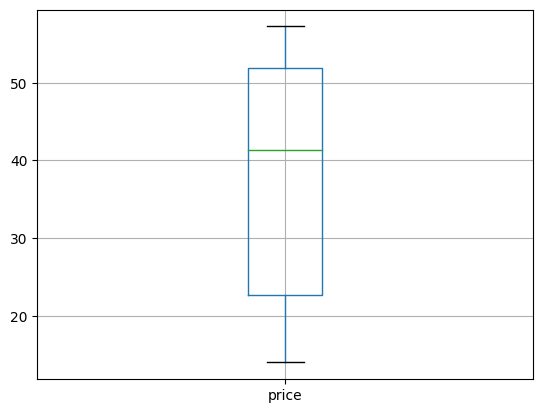

In [338]:
boxplot = df.boxplot(column=['price'])

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each book listed on the page, proceed to the individual page for each book, and extract the quantity of available copies. Subsequently, you are required to compute both the mean and standard deviation of the quantities of these books.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [339]:
# Write your code here. Add as many code boxes as you need.

In [340]:
lista= browser.find_elements(By.CSS_SELECTOR, 'ol > li > article > div.image_container > a')

In [341]:
l=[]
for i in lista:
  l.append(i.get_attribute('href'))
l

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

In [342]:
stock = []
for i in range(len(lista)):
    try:
        # Re-locate the element in each iteration to avoid stale reference
        element = lista[i]
        element.click()

        # Wait for the stock information element to be present
        stock_element = WebDriverWait(browser, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "#content_inner > article > div.row > div.col-sm-6.product_main > p.instock.availability"))
        )
        stock_info = stock_element.text
        stock.append(stock_info)

        # Go back to the previous page
        browser.back()

    except :
        # Handle the StaleElementReferenceException as needed
        print("Stale element reference. Moving to the next item.")

Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.
Stale element reference. Moving to the next item.


In [343]:

stock

['In stock (22 available)']

In [344]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
